In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [41]:
dataframe = pd.read_excel('出境(1).xlsx',index_col=0)
# 选取前26行
dataframe = dataframe.iloc[:26,:]
# 选取列标签为中国的这一列
dataframe = dataframe.loc[:,['中国']]
# 在dataframe中增加一列,记录是否发生突发事件
dataframe['突发事件'] = 0
# 将最后一行的突发事件改为1
dataframe.iloc[-1,-1] = 1
dataframe

,中国,突发事件
1995.0,4520000.0,0
1996.0,5061000.0,0
1997.0,5324000.0,0
1998.0,8426000.0,0
1999.0,9232000.0,0
2000.0,10473000.0,0
2001.0,12133000.0,0
2002.0,16602000.0,0
2003.0,20222000.0,0
2004.0,28853000.0,0


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


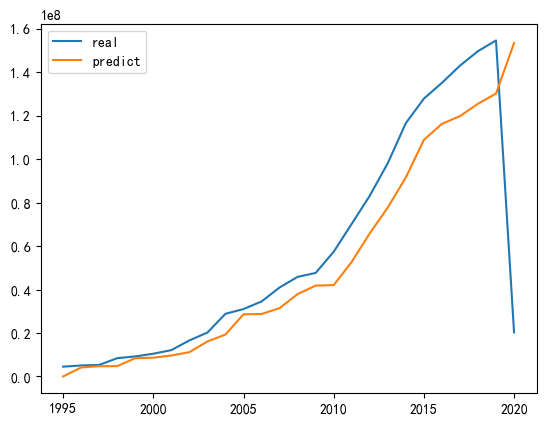

In [46]:
need_predict = dataframe["中国"]
oher_effect = dataframe['突发事件']
colors = plt.cm.viridis(np.linspace(0, 1, 11))
model = SARIMAX(need_predict, exog=oher_effect, order=(2, 0, 1))
results = model.fit(disp=False)
predictions = results.fittedvalues
plt.plot(need_predict, label='real')
plt.plot(predictions, label='predict')
plt.legend()

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


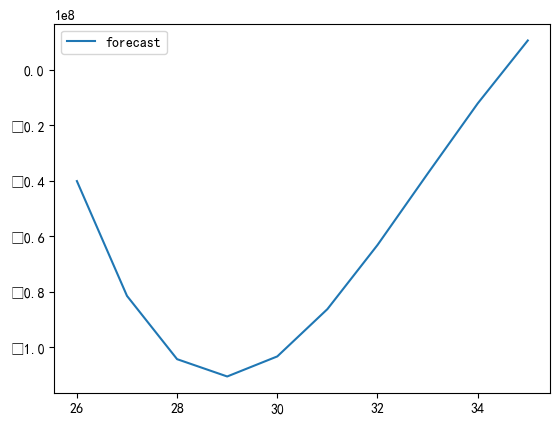

In [47]:
# 预测未来10年
forecast = results.forecast(steps=10, exog=np.ones(10))
plt.plot(forecast, label='forecast')
plt.legend()